In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
!pip install openpyxl
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB31.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB22.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripA07.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB18.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB35.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripA30.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB34.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB24.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripA15.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripA18.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB12.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripA27.csv
/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB36.csv
/kaggle/input/battery-and-heating-data

In [3]:
df = pd.read_excel('/kaggle/input/battery-and-heating-data-in-real-driving-cycles/Overview.xlsx')

In [5]:
df

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Unnamed: 8,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Unnamed: 13,Fan,Note
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000,NaN,"Automatic, Level 1",NaN
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000,NaN,"Automatic, Level 1",Target Cabin Temperature changed
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000,NaN,"Automatic, Level 1",Target Cabin Temperature changed
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000,NaN,"Automatic, Level 1",NaN
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667,NaN,"Automatic, Level 1",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,TripB34,2020-01-14_12-55-08,Munich North,cloudy,11.0,11.0,0.739,0.713,0.026,5.5,22.0,9.143200,12.228333,NaN,"Automatic, Level 1",+ 160 kg
68,TripB35,2020-01-14_17-59-06,Munich North,dark,11.0,13.0,0.854,0.715,0.139,4.0,22.0,15.419300,22.708333,NaN,"Automatic, Level 1",NaN
69,TripB36,2020-01-15_10-43-44,Munich North,sunny,6.0,10.0,0.721,0.445,0.276,4.0,22.0,38.718800,47.536667,NaN,"Automatic, Level 1",Open door at 37:10 and 42:00 for 30s
70,TripB37,2020-01-21_09-15-20,Munich East,slightly cloudy,8.0,10.0,0.838,0.680,0.158,-3.0,22.0,17.462600,23.620000,NaN,"Automatic, Level 1",NaN


In [61]:
import chardet    
rawdata = open('/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB26.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
df_trip = pd.read_csv('/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB26.csv', sep = ';',encoding = charenc)
df_trip

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],max. Battery Temperature [°C],SoC [%],displayed SoC [%],min. SoC [%],max. SoC [%),...,Temperature Defrost lateral left [°C],Temperature Defrost lateral right [°C],Temperature Defrost central [°C],Temperature Defrost central left [°C],Temperature Defrost central right [°C],Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C]
0,0.0,0.0,510.0,0.0,0.0,-0.06,0.0,363.70,-4.50,12.0,13.0,33.4,33.0,8.0,88.5,...,21.70,23.53,24.14,26.50,25.27,15.41,16.28,31.91,30.95,15.67,15.76,23.62,20.91,17.33,23.09
1,0.1,0.0,510.0,0.0,0.0,-0.05,0.0,363.70,-4.62,12.0,13.0,33.4,33.0,8.0,88.5,...,21.70,23.53,24.14,26.50,25.27,15.41,16.28,31.91,30.95,15.67,15.76,23.62,20.91,17.33,23.09
2,0.2,0.0,510.0,0.0,0.0,-0.05,0.0,363.70,-5.37,12.0,13.0,33.4,33.0,8.0,88.5,...,21.70,23.53,24.14,26.50,25.27,15.41,16.28,31.91,30.95,15.67,15.76,23.62,20.91,17.33,23.09
3,0.3,0.0,510.0,0.0,0.0,-0.09,0.0,363.69,-5.94,12.0,13.0,33.4,33.0,8.0,88.5,...,21.68,23.53,24.14,26.48,25.27,15.40,16.28,31.91,30.95,15.65,15.74,23.62,20.91,17.33,23.08
4,0.4,0.0,510.0,0.0,0.0,-0.08,0.0,363.64,-5.59,12.0,13.0,33.4,33.0,8.0,88.5,...,21.60,23.50,24.12,26.40,25.24,15.32,16.29,31.91,30.99,15.51,15.63,23.59,20.88,17.30,22.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,804.5,0.0,477.0,0.0,0.0,-0.35,0.0,346.80,-4.20,15.0,15.0,21.2,17.5,8.0,88.5,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20
8046,804.6,0.0,477.0,0.0,0.0,-0.34,0.0,346.80,-4.24,15.0,15.0,21.2,17.5,8.0,88.5,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20
8047,804.7,0.0,477.0,0.0,0.0,-0.35,0.0,346.80,-4.29,15.0,15.0,21.2,17.5,8.0,88.5,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20
8048,804.8,0.0,477.0,0.0,0.0,-0.34,0.0,346.80,-4.30,15.0,15.0,21.2,17.5,8.0,88.5,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20


In [7]:
df_trip_req = df_trip[['Velocity [km/h]','Elevation [m]','Throttle [%]','Motor Torque [Nm]','Longitudinal Acceleration [m/s^2]','Regenerative Braking Signal ','Battery Voltage [V]','Battery Current [A]','Battery Temperature [°C]','max. Battery Temperature [°C]']]

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]',
       'Heating Power LIN [W]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]',
       'Heater Current [A]', 'Ambient Temperature [°C]',
       'Ambient Temperature Sensor [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Coolant Volume Flow +500 [l/h]', 'Heat Exchanger Temperature [°C]',
       'Cabin Temperature Sensor [°C]',
       'Temperature Coolant Heater Inlet [°C]',
       'Temperature Coolant Heater Outlet [°C]',
       'Temperature Heat Exchanger Outle

In [38]:
import os
import glob
import chardet 
import pandas as pd
df_master = pd.DataFrame()
for file_name in glob.glob('/kaggle/input/battery-and-heating-data-in-real-driving-cycles/'+'*.csv'):
    rawdata = open(file_name, 'rb').read()
    result = chardet.detect(rawdata)
    charenc = result['encoding']
    df_trip = pd.read_csv(file_name, sep = ';',encoding = charenc)
    df_master = df_master.append(df_trip)
#     x = pd.read_csv(file_name, low_memory=False)

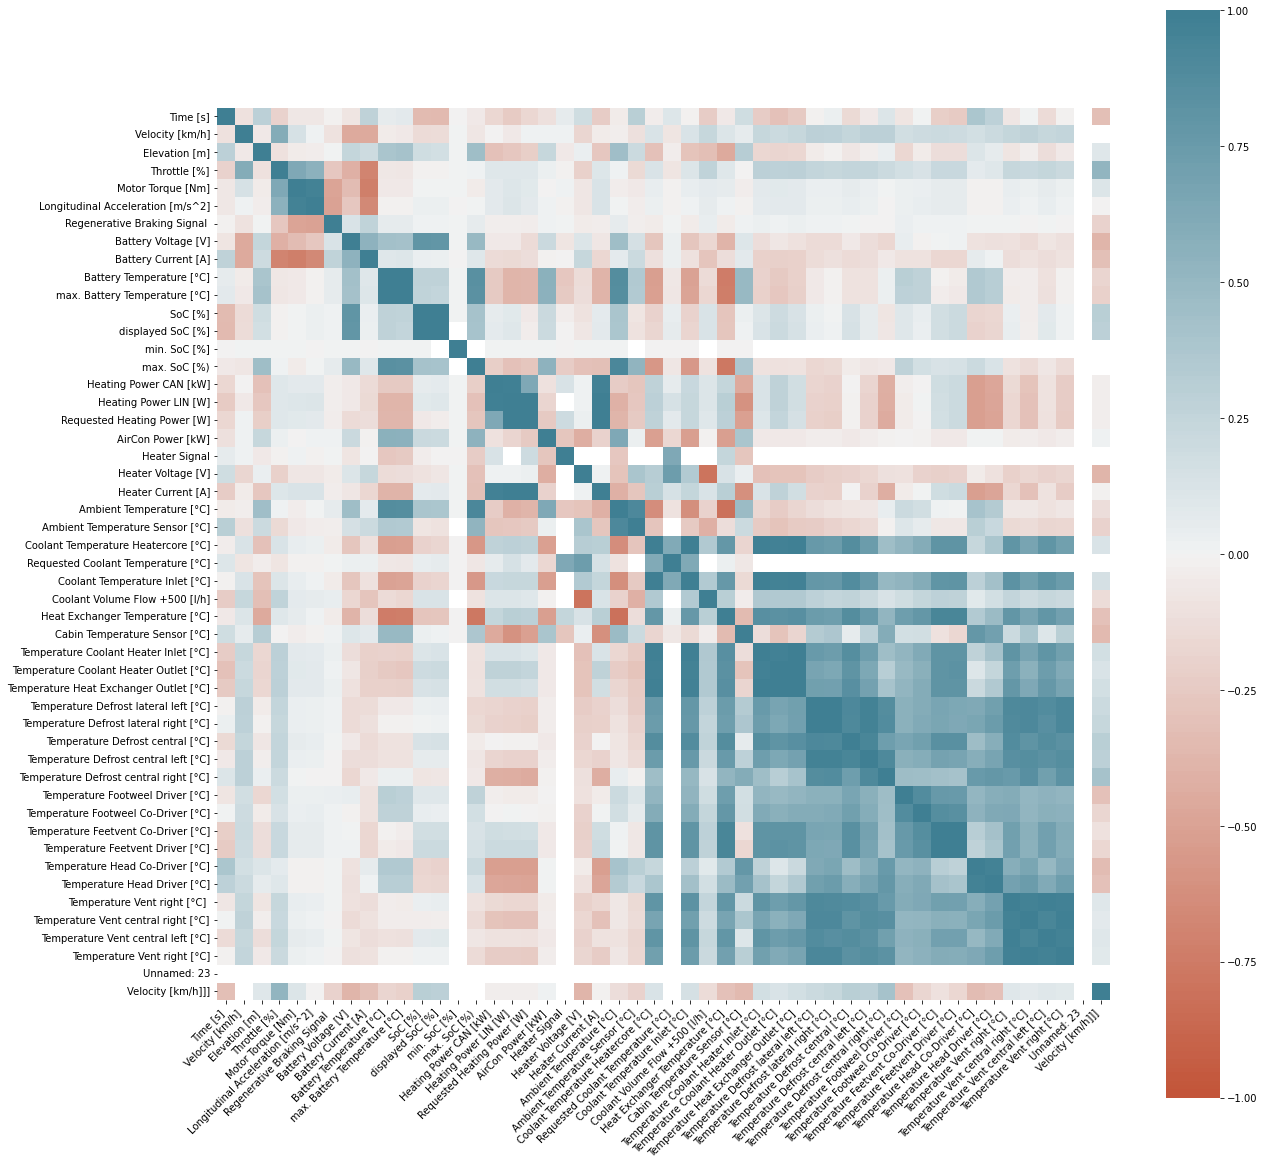

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_master.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [8]:
import sklearn

In [9]:
from sklearn.datasets import make_regression
# create datasets
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1, noise=0.5)
# summarize dataset
print(X.shape, y.shape)

(1000, 10) (1000, 2)


array([[<AxesSubplot:title={'center':'SoC [%]'}>]], dtype=object)

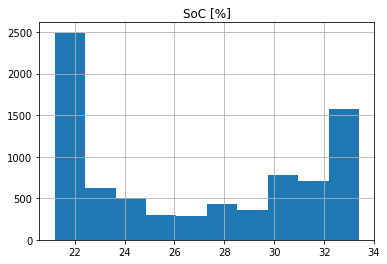

In [12]:
df_trip.hist('SoC [%]')

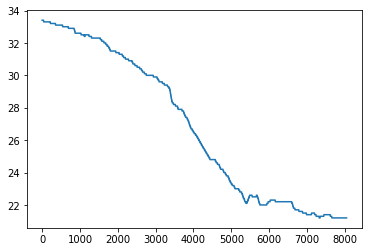

In [14]:
import matplotlib.pyplot as plt
plt.plot(df_trip['SoC [%]'])

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import RFE
from sklearn import metrics
from scipy.stats import pearsonr
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
pd.set_option('max_columns', 30)
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

%matplotlib inline

In [29]:

df_trip = df_trip.dropna()

In [30]:
# def select_feature(df):
#     print("extract feature")

# separate into input and output variables
array = df.values
X = df_trip.drop(['SoC [%]', 'displayed SoC [%]','min. SoC [%]', 'max. SoC [%)'],axis=1)
y = df_trip[['SoC [%]']]

In [28]:
y

,SoC [%]
0,33.4
1,33.4
2,33.4
3,33.4
4,33.4
...,...
8045,21.2
8046,21.2
8047,21.2
8048,21.2


In [33]:
# Scale the data set
scaler = MinMaxScaler(feature_range=(0, 1))
x_transformed = scaler.fit_transform(X)

# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=50, random_state=1))
fit = rfe.fit(X, y)

# report selected features
print('Selected Features:')
names = df.columns.values[0:-1]
for i in range(len(fit.support_)):

    if fit.support_[i]:
        print(names[i])

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Selected Features:
Trip
Date
Route/Area


IndexError: index 19 is out of bounds for axis 0 with size 15

In [69]:
import chardet    
rawdata = open('/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB26.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
df_trip = pd.read_csv('/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB26.csv', sep = ';',encoding = charenc)
df_trip = df_trip.dropna()
df_trip

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],max. Battery Temperature [°C],SoC [%],displayed SoC [%],min. SoC [%],max. SoC [%),...,Temperature Defrost lateral left [°C],Temperature Defrost lateral right [°C],Temperature Defrost central [°C],Temperature Defrost central left [°C],Temperature Defrost central right [°C],Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C]
0,0.0,0.0,510.0,0.0,0.0,-0.06,0.0,363.70,-4.50,12.0,13.0,33.4,33.0,8.0,88.5,...,21.70,23.53,24.14,26.50,25.27,15.41,16.28,31.91,30.95,15.67,15.76,23.62,20.91,17.33,23.09
1,0.1,0.0,510.0,0.0,0.0,-0.05,0.0,363.70,-4.62,12.0,13.0,33.4,33.0,8.0,88.5,...,21.70,23.53,24.14,26.50,25.27,15.41,16.28,31.91,30.95,15.67,15.76,23.62,20.91,17.33,23.09
2,0.2,0.0,510.0,0.0,0.0,-0.05,0.0,363.70,-5.37,12.0,13.0,33.4,33.0,8.0,88.5,...,21.70,23.53,24.14,26.50,25.27,15.41,16.28,31.91,30.95,15.67,15.76,23.62,20.91,17.33,23.09
3,0.3,0.0,510.0,0.0,0.0,-0.09,0.0,363.69,-5.94,12.0,13.0,33.4,33.0,8.0,88.5,...,21.68,23.53,24.14,26.48,25.27,15.40,16.28,31.91,30.95,15.65,15.74,23.62,20.91,17.33,23.08
4,0.4,0.0,510.0,0.0,0.0,-0.08,0.0,363.64,-5.59,12.0,13.0,33.4,33.0,8.0,88.5,...,21.60,23.50,24.12,26.40,25.24,15.32,16.29,31.91,30.99,15.51,15.63,23.59,20.88,17.30,22.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,804.4,0.0,477.0,0.0,0.0,-0.36,0.0,346.80,-4.20,15.0,15.0,21.2,17.5,8.0,88.5,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20
8045,804.5,0.0,477.0,0.0,0.0,-0.35,0.0,346.80,-4.20,15.0,15.0,21.2,17.5,8.0,88.5,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20
8046,804.6,0.0,477.0,0.0,0.0,-0.34,0.0,346.80,-4.24,15.0,15.0,21.2,17.5,8.0,88.5,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20
8047,804.7,0.0,477.0,0.0,0.0,-0.35,0.0,346.80,-4.29,15.0,15.0,21.2,17.5,8.0,88.5,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20


In [70]:
df_trip_v  = df_trip.values
df_trip_v

array([[0.000e+00, 0.000e+00, 5.100e+02, ..., 2.091e+01, 1.733e+01,
        2.309e+01],
       [1.000e-01, 0.000e+00, 5.100e+02, ..., 2.091e+01, 1.733e+01,
        2.309e+01],
       [2.000e-01, 0.000e+00, 5.100e+02, ..., 2.091e+01, 1.733e+01,
        2.309e+01],
       ...,
       [8.046e+02, 0.000e+00, 4.770e+02, ..., 3.007e+01, 3.042e+01,
        2.920e+01],
       [8.047e+02, 0.000e+00, 4.770e+02, ..., 3.007e+01, 3.042e+01,
        2.920e+01],
       [8.048e+02, 0.000e+00, 4.770e+02, ..., 3.007e+01, 3.042e+01,
        2.920e+01]])

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_trip.drop(['SoC [%]', 'displayed SoC [%]','min. SoC [%]', 'max. SoC [%)'],axis=1),df_trip[['SoC [%]']],test_size=0.3)

In [75]:
df_trip.drop(['SoC [%]', 'displayed SoC [%]','min. SoC [%]', 'max. SoC [%)'],axis=1)

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],max. Battery Temperature [°C],Heating Power CAN [kW],Heating Power LIN [W],Requested Heating Power [W],AirCon Power [kW],...,Temperature Defrost lateral left [°C],Temperature Defrost lateral right [°C],Temperature Defrost central [°C],Temperature Defrost central left [°C],Temperature Defrost central right [°C],Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C]
0,0.0,0.0,510.0,0.0,0.0,-0.06,0.0,363.70,-4.50,12.0,13.0,0.64,1240.00,1440.00,0,...,21.70,23.53,24.14,26.50,25.27,15.41,16.28,31.91,30.95,15.67,15.76,23.62,20.91,17.33,23.09
1,0.1,0.0,510.0,0.0,0.0,-0.05,0.0,363.70,-4.62,12.0,13.0,0.64,1240.00,1512.14,0,...,21.70,23.53,24.14,26.50,25.27,15.41,16.28,31.91,30.95,15.67,15.76,23.62,20.91,17.33,23.09
2,0.2,0.0,510.0,0.0,0.0,-0.05,0.0,363.70,-5.37,12.0,13.0,0.64,1309.59,1612.13,0,...,21.70,23.53,24.14,26.50,25.27,15.41,16.28,31.91,30.95,15.67,15.76,23.62,20.91,17.33,23.09
3,0.3,0.0,510.0,0.0,0.0,-0.09,0.0,363.69,-5.94,12.0,13.0,0.64,1409.60,1712.12,0,...,21.68,23.53,24.14,26.48,25.27,15.40,16.28,31.91,30.95,15.65,15.74,23.62,20.91,17.33,23.08
4,0.4,0.0,510.0,0.0,0.0,-0.08,0.0,363.64,-5.59,12.0,13.0,0.64,1509.59,1812.11,0,...,21.60,23.50,24.12,26.40,25.24,15.32,16.29,31.91,30.99,15.51,15.63,23.59,20.88,17.30,22.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,804.4,0.0,477.0,0.0,0.0,-0.36,0.0,346.80,-4.20,15.0,15.0,1.04,1040.00,1080.00,0,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20
8045,804.5,0.0,477.0,0.0,0.0,-0.35,0.0,346.80,-4.20,15.0,15.0,1.04,1050.70,1080.00,0,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20
8046,804.6,0.0,477.0,0.0,0.0,-0.34,0.0,346.80,-4.24,15.0,15.0,1.04,1070.70,1080.00,0,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20
8047,804.7,0.0,477.0,0.0,0.0,-0.35,0.0,346.80,-4.29,15.0,15.0,1.04,1080.00,1080.00,0,...,30.42,30.86,33.04,33.13,32.78,21.26,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20


In [89]:
y_train.shape

(2415, 44)

In [87]:
X_test.shape

(5634, 1)

In [78]:
y_test.shape

(2415, 1)

In [48]:
feature_columns = [tf.feature_column.numeric_column("x", shape = [17])]

regressor = tf.estimator.DNNRegressor(feature_columns = feature_columns,
                                      hidden_units    = [16, 31, 16])

train_input_fn = tf.estimator.inputs.numpy_input_fn(x = np.array(X_train),
                                                    y = np.array(y_train),
                                                    num_epochs = None)



#  tf.compat.v1.estimator.inputs

AttributeError: module 'tensorflow_estimator.python.estimator.api._v2.estimator' has no attribute 'inputs'

In [ ]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(x = {"x": np.array(X_test)},
                                                      num_epochs = 1,
                                                      shuffle = False)
regressor.train(input_fn = train_input_fn, steps = 100)
y_pred = regressor.predict(predict_input_fn)

In [90]:
KRmodel = KernelRidge(alpha=1.0)
KRmodel.fit(X_train, X_test)
y_pred_kr = KRmodel.predict(y_train)

NameError: name 'test_rows' is not defined

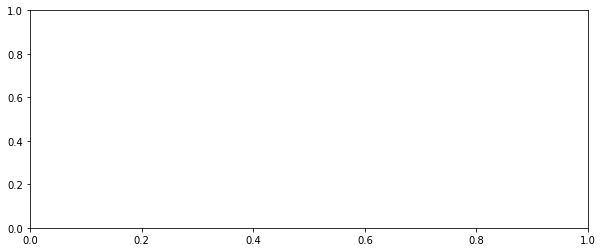

In [94]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 4))

axes.scatter(test_rows['cycle'], y_test, color = 'green', label = 'Real RUL', alpha = 0.7, s = 15)
axes.scatter(test_rows['cycle'], y_pred_kr, color = 'blue', label = 'Predicted RUL', alpha = 0.7, s = 15)
axes.set_xlabel('Cycle')
axes.set_ylabel('RUL [cycles]')
axes.set_ylim([0, 250])
axes.set_title('KR - Difference')

axes.legend()

plt.show()

In [51]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 5.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 MB 9.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.1
    Uninstalling xgboost-1.6.1:
      Successfully uninstalled xgboost-1.6.1


In [93]:
np.X_train

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],max. Battery Temperature [°C],Heating Power CAN [kW],Heating Power LIN [W],Requested Heating Power [W],AirCon Power [kW],...,Temperature Defrost lateral left [°C],Temperature Defrost lateral right [°C],Temperature Defrost central [°C],Temperature Defrost central left [°C],Temperature Defrost central right [°C],Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C]
2330,233.0,77.79,500.61,40.07,6.00,-0.15,0.0,356.44,-16.44,13.0,13.0,1.12,1200.0,1200.00,0,...,31.06,31.77,37.06,33.74,31.12,26.03,28.27,44.32,43.84,20.65,21.99,36.01,35.89,38.43,33.33
7095,709.5,55.14,476.16,19.08,-24.00,-0.57,0.0,348.60,25.96,15.0,15.0,1.04,1080.0,1080.00,0,...,30.42,30.78,33.48,33.46,33.03,21.35,25.29,40.37,39.01,20.31,21.94,31.82,31.03,31.48,29.81
578,57.8,19.41,510.00,27.21,9.47,0.47,0.0,361.72,-9.99,12.0,13.0,1.72,1760.0,1792.27,0,...,27.19,28.03,33.74,28.55,25.40,23.83,27.71,48.27,47.75,17.64,18.33,32.46,30.81,34.23,28.46
5699,569.9,40.28,479.35,62.10,144.60,2.41,0.0,332.17,-151.30,15.0,15.0,0.84,840.0,840.00,0,...,30.51,31.08,33.70,33.57,33.09,21.05,26.15,40.50,38.09,19.43,21.48,32.13,31.56,32.13,30.07
7661,766.1,32.79,476.81,42.85,40.90,0.51,0.0,342.90,-38.15,15.0,15.0,0.88,880.0,880.00,0,...,30.49,31.01,33.30,33.30,32.87,21.52,26.03,40.11,38.28,19.76,16.87,31.41,30.34,30.86,29.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166,716.6,34.57,476.04,30.93,-3.99,-0.33,0.0,346.93,-3.12,15.0,15.0,1.04,1040.0,1040.00,0,...,30.34,30.77,33.39,33.39,32.95,21.02,25.69,40.37,38.89,20.58,21.76,31.82,30.93,31.38,29.70
3480,348.0,125.55,495.32,40.23,10.00,-0.12,0.0,346.66,-37.30,13.0,14.0,1.24,1240.0,1240.00,0,...,31.12,31.79,35.99,34.61,33.39,23.76,27.56,43.99,43.72,20.18,22.72,34.44,34.96,36.10,32.26
993,99.3,41.17,509.03,28.70,-6.08,-0.22,0.0,361.84,-0.98,13.0,13.0,1.52,1560.0,1560.00,0,...,28.50,29.11,35.84,30.07,26.66,25.10,28.70,50.14,49.80,18.03,20.65,34.70,33.47,36.97,30.51
6072,607.2,6.81,477.00,17.90,-29.43,-0.60,0.0,347.60,-1.08,15.0,16.0,0.96,960.0,960.00,0,...,30.51,31.03,33.57,33.48,32.95,21.25,25.64,40.53,38.18,20.21,21.70,31.99,31.30,31.82,29.99


In [ ]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train.to_numpy(), X_test.to_numpy(), task="regression")

[flaml.automl: 06-25 14:11:44] {2390} INFO - task = regression
[flaml.automl: 06-25 14:11:44] {2392} INFO - Data split method: uniform
[flaml.automl: 06-25 14:11:44] {2396} INFO - Evaluation method: holdout
[flaml.automl: 06-25 14:11:44] {2465} INFO - Minimizing error metric: 1-r2
[flaml.automl: 06-25 14:11:45] {2514} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl: 06-25 14:11:45] {2605} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 06-25 14:11:45] {2897} INFO - iteration 0, current learner lgbm
[flaml.automl: 06-25 14:11:48] {3026} INFO - Estimated sufficient time budget=30566s. Estimated necessary time budget=261s.
[flaml.automl: 06-25 14:11:48] {3078} INFO -  at 3.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best 